In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [20]:
data = pd.read_csv(r"/content/reduced_dataset3.csv")

In [21]:
X = data.drop('num',axis=1)
y = data['num']

# 1. K-Means Clustering with Elbow Method

In [22]:
# Determine optimal k using elbow method
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

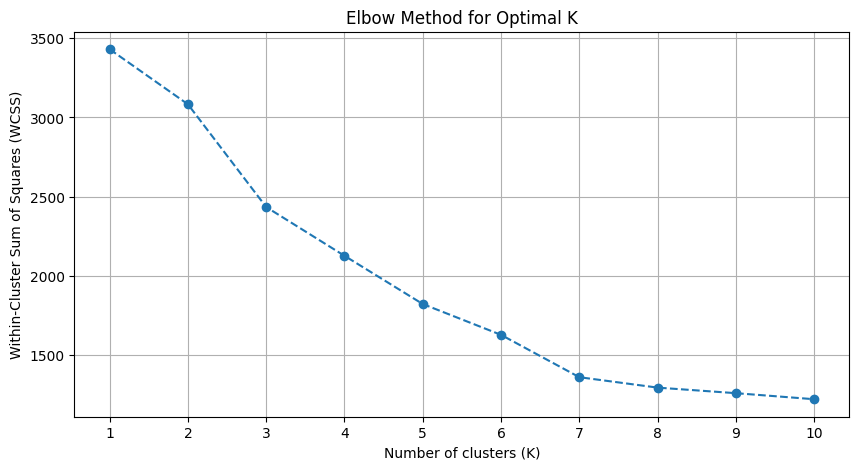

In [23]:
# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid()
plt.show()

In [24]:
for k in [2, 3]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhouette Score for K={k}: {score:.3f}")

Silhouette Score for K=2: 0.256
Silhouette Score for K=3: 0.230


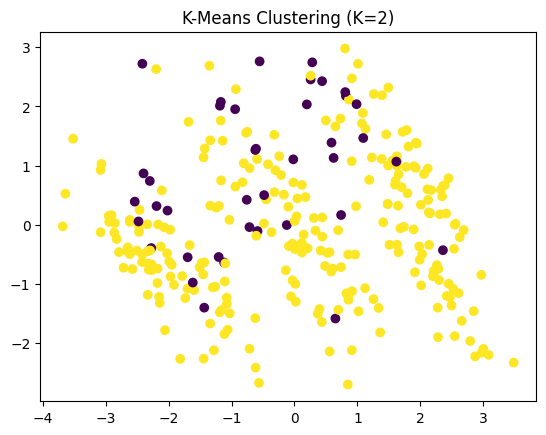

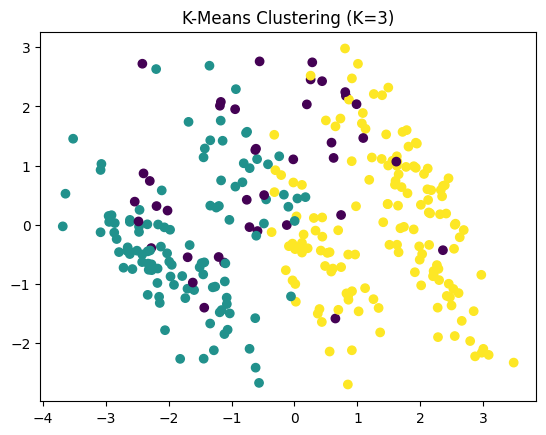

In [27]:
for k in [2, 3]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    plt.figure()
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.title(f'K-Means Clustering (K={k})')
    plt.show()

In [25]:
# Based on elbow method, select optimal k
optimal_k = 2

# Perform K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [26]:
# Compare with actual labels (if available)
if y is not None:
    ari = adjusted_rand_score(y, kmeans_labels)
    print(f"Adjusted Rand Index (comparison with true labels): {ari:.3f}")

Adjusted Rand Index (comparison with true labels): 0.008


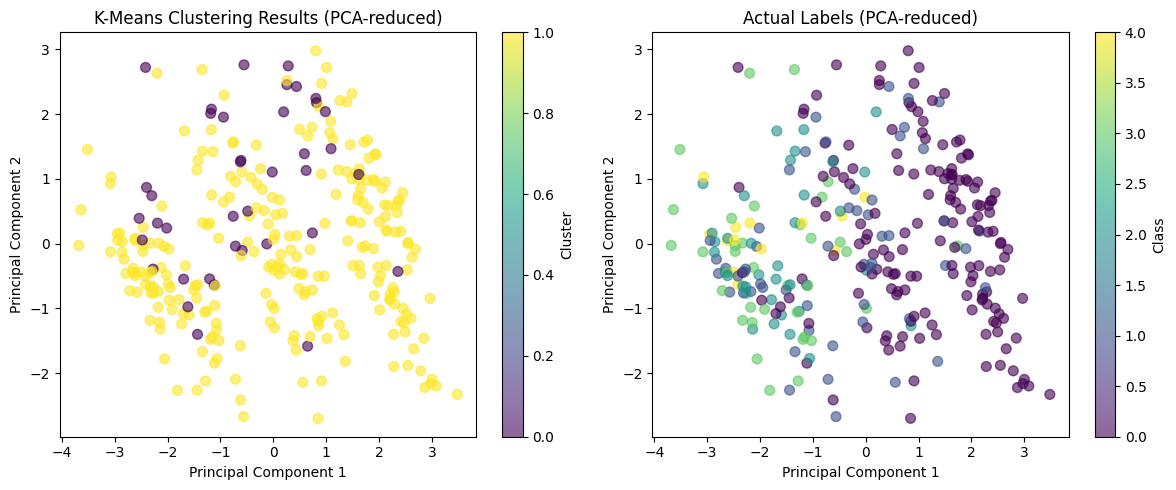

In [28]:
# Visualize K-Means results (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('K-Means Clustering Results (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
if y is not None:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.6)
    plt.title('Actual Labels (PCA-reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Class')
plt.tight_layout()
plt.show()

# 2. Hierarchical Clustering with Dendrogram Analysis

In [30]:
# Create linkage matrix
linked = linkage(X, method='ward')

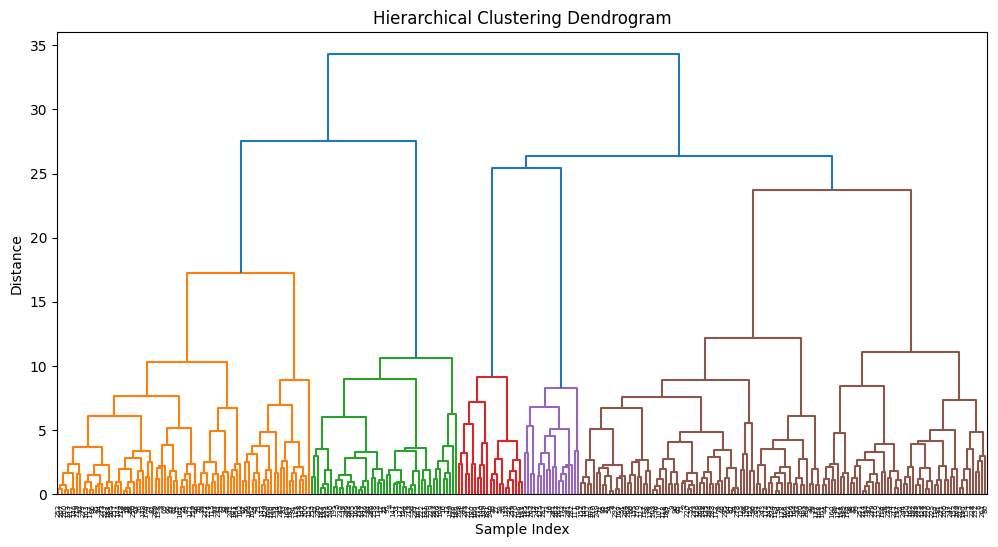

In [31]:
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [34]:
# Perform Agglomerative Clustering (let's choose 2 clusters based on dendrogram)
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X)

# Calculate silhouette score
hc_silhouette = silhouette_score(X, hc_labels)
print(f"Hierarchical Clustering Silhouette Score: {hc_silhouette:.3f}")

Hierarchical Clustering Silhouette Score: 0.188


In [35]:
# Compare with actual labels (if available)
if y is not None:
    hc_ari = adjusted_rand_score(y, hc_labels)
    print(f"Adjusted Rand Index (comparison with true labels): {hc_ari:.3f}")

Adjusted Rand Index (comparison with true labels): 0.084


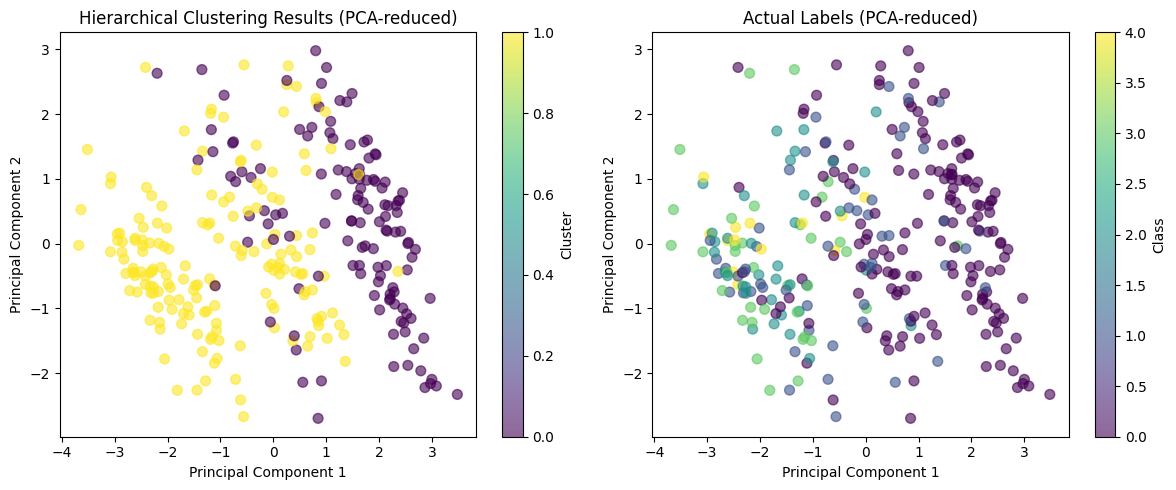

In [36]:
# Visualize Hierarchical Clustering results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('Hierarchical Clustering Results (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
if y is not None:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.6)
    plt.title('Actual Labels (PCA-reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Class')
plt.tight_layout()
plt.show()

# 3. Compare clustering results

In [37]:
# Compare K-Means and Hierarchical results
comparison = pd.crosstab(pd.Series(kmeans_labels, name='K-Means'),
                         pd.Series(hc_labels, name='Hierarchical'))
print("\nContingency table between K-Means and Hierarchical Clustering:")
print(comparison)



Contingency table between K-Means and Hierarchical Clustering:
Hierarchical    0    1
K-Means               
0               0   39
1             128  130


In [38]:
# Compare both methods with actual labels
if y is not None:
    print("\nComparison with true labels:")
    comparison_results = pd.DataFrame({
        'K-Means ARI': [adjusted_rand_score(y, kmeans_labels)],
        'Hierarchical ARI': [adjusted_rand_score(y, hc_labels)],
        'K-Means Silhouette': [silhouette_avg],
        'Hierarchical Silhouette': [hc_silhouette]
    })
    print(comparison_results.round(3))


Comparison with true labels:
   K-Means ARI  Hierarchical ARI  K-Means Silhouette  Hierarchical Silhouette
0        0.008             0.084               0.256                    0.188


In [51]:
# Compare cluster characteristics
cluster_profile = pd.DataFrame(X).groupby(kmeans_labels).mean()
print("Cluster Feature Means:")
print(cluster_profile)
feature_names = ['PC2', 'PC1', 'PC6', 'PC3', 'PC4', 'PC5', 'PC8', 'PC9','PC7']
# Check if clusters correlate with any specific features
for feature in range(X.shape[1]):
    print(f"{feature_names[feature]}:")
    print(pd.DataFrame({
        'Cluster 0': pd.DataFrame(X[kmeans_labels==0]).reset_index(drop=True).iloc[:, feature].mean(),
        'Cluster 1': pd.DataFrame(X[kmeans_labels==1]).reset_index(drop=True).iloc[:, feature].mean(),
        'Class 0': pd.DataFrame(X[y==0]).reset_index(drop=True).iloc[:, feature].mean(),
        'Class 1': pd.DataFrame(X[y==1]).reset_index(drop=True).iloc[:, feature].mean()
    }, index=['Mean']))

Cluster Feature Means:
        PC2       PC1       PC6       PC3       PC4       PC5       PC8  \
0  0.856416 -0.563634 -0.109586 -1.228916  1.510204 -1.460849 -0.700085   
1 -0.129458  0.085201  0.016565  0.185766 -0.228287  0.220826  0.105827   

        PC9       PC7  
0 -0.233326  0.456997  
1  0.035270 -0.069081  
PC2:
      Cluster 0  Cluster 1  Class 0   Class 1
Mean   0.856416  -0.129458  0.10409 -0.135693
PC1:
      Cluster 0  Cluster 1  Class 0   Class 1
Mean  -0.563634   0.085201  1.08011 -0.560822
PC6:
      Cluster 0  Cluster 1   Class 0   Class 1
Mean  -0.109586   0.016565 -0.017067 -0.075618
PC3:
      Cluster 0  Cluster 1   Class 0   Class 1
Mean  -1.228916   0.185766  0.005428 -0.004085
PC4:
      Cluster 0  Cluster 1   Class 0  Class 1
Mean   1.510204  -0.228287  0.033117  0.08039
PC5:
      Cluster 0  Cluster 1   Class 0   Class 1
Mean  -1.460849   0.220826 -0.042233  0.111089
PC8:
      Cluster 0  Cluster 1   Class 0   Class 1
Mean  -0.700085   0.105827 -0.012798  0